In [7]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from src.detection import run_bls, download_lightcurve

In [8]:
lc = download_lightcurve("Kepler-6b")

lc_clean = (
    lc
    .remove_nans()
    .remove_outliers(sigma=5)
    .flatten(window_length=401)
)

In [9]:
time = lc_clean.time.value
flux = lc_clean.flux.value


In [ ]:
bls_out = run_bls(
    time,
    flux,
    min_period=1.0,
    max_period=5.0   # tighter range helps a lot
)

best_period = bls_out["best_period"]
t0 = bls_out["t0"]
power = bls_out["power"]

best_period, t0


(np.float64(3.2348469693938786), np.float64(169.96013713262045))

# BLS Detection Results
BLS successfully recovered the known transit of Kepler-6b

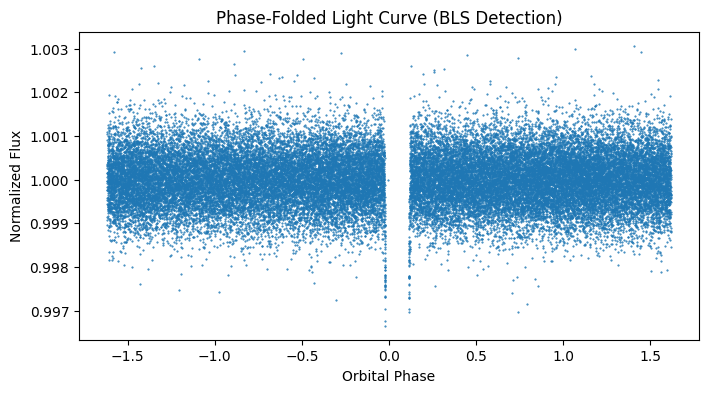

In [11]:
lc_folded = lc_clean.fold(
    period=best_period,
    epoch_time=t0
)

plt.figure(figsize=(8, 4))
plt.plot(lc_folded.phase.value, lc_folded.flux.value, ".", markersize=1)
plt.xlabel("Orbital Phase")
plt.ylabel("Normalized Flux")
plt.title("Phase-Folded Light Curve (BLS Detection)")
plt.show()




In [12]:

run_bls(time, flux)

{'best_period': np.float64(3.234246849369874),
 't0': np.float64(170.00513713262043),
 'power': np.float64(6.727069109660858e-05),
 'results':           depth: array([3.30340204e-05, 2.60720968e-05, 2.52503082e-05, ...,
        1.65235429e-04, 1.62771698e-04, 1.91674446e-04], shape=(5000,))
       depth_err: array([0.02301819, 0.02281249, 0.02315124, ..., 0.08348377, 0.08377412,
        0.10732806], shape=(5000,))
       depth_snr: array([0.00143513, 0.00114289, 0.00109067, ..., 0.00197925, 0.00194298,
        0.00178587], shape=(5000,))
        duration: array([0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05], shape=(5000,))
  log_likelihood: array([1.08360778e-06, 6.87911283e-07, 6.25464081e-07, ...,
        1.96579779e-06, 1.89436573e-06, 1.59815055e-06], shape=(5000,))
       objective: 'likelihood'
          period: array([ 1.        ,  1.00180036,  1.00360072, ...,  9.99639928,
         9.99819964, 10.        ], shape=(5000,))
           power: array([1.08360778e-06, 6.87911283e-07, 6.25

In [14]:
print(f"BLS detected period: {best_period:.4f} days")
print(f"BLS power: {power:.2e}")


BLS detected period: 3.2348 days


NameError: name 'power' is not defined